In [1]:
import os

import numpy as np
import pandas as pd

import math
from natsort import natsorted

from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from utils.utility_functions import categorical_cmap

from IPython.display import display, clear_output
from ipywidgets import interactive, widgets

In [2]:
def interactive_plot(Clustering, elev, azim):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if Clustering == 'VAE9_ROT_VIG18':
        
        print (f'{Clustering} clustering')

        ax.scatter(
            data_dict[Clustering][0]['VAE9_ROT_VIG18_emb_3d_1'],
            data_dict[Clustering][0]['VAE9_ROT_VIG18_emb_3d_2'],
            data_dict[Clustering][0]['VAE9_ROT_VIG18_emb_3d_3'],
            cmap=data_dict[Clustering][1],
            c=data_dict[Clustering][2],
            s=150000 / len(data_dict[Clustering][0]),
            ec=['k' for i in data_dict[Clustering][0][Clustering]],
            linewidth=0.0
        )
        
        legend_elements = []
        for e, i in enumerate(natsorted(data_dict[Clustering][0][Clustering].unique())):
    
            legend_elements.append(
                Line2D([0], [0], marker='o',
                       color='none',
                       label=f'{Clustering} cluster {i}',
                       markerfacecolor=data_dict[Clustering][1].colors[e],
                       markeredgecolor='none',
                       lw=0.001, markersize=8)
            )
        
        cluster_lgd = ax.legend(
            handles=legend_elements, prop={'size': 10}, bbox_to_anchor=[1.3, 0.95]
        )
    
    elif Clustering == 'VAE20_Leiden':
        
        print (f'{Clustering} clustering')
        
        ax.scatter(
            data_dict[Clustering][0]['VAE20_emb_3d_1'],
            data_dict[Clustering][0]['VAE20_emb_3d_2'],
            data_dict[Clustering][0]['VAE20_emb_3d_3'],
            cmap=data_dict[Clustering][1],
            c=data_dict[Clustering][2],
            s=150000 / len(data_dict[Clustering][0]),
            ec=['k' for i in data_dict[Clustering][0][Clustering]],
            linewidth=0.0
        )
        
        legend_elements = []
        for e, i in enumerate(natsorted(data_dict[Clustering][0][Clustering].unique())):
    
            legend_elements.append(
                Line2D([0], [0], marker='o',
                       color='none',
                       label=f'{Clustering} cluster {i}',
                       markerfacecolor=data_dict[Clustering][1].colors[e],
                       markeredgecolor='none',
                       lw=0.001, markersize=8)
            )
        
        cluster_lgd = ax.legend(
            handles=legend_elements, prop={'size': 10}, bbox_to_anchor=[1.3, 0.95]
        )
    
    elif Clustering == 'seg':
        
        print (f'{Clustering} clustering')
        
        ax.scatter(
            data_dict[Clustering][0]['seg_emb1'],
            data_dict[Clustering][0]['seg_emb2'],
            data_dict[Clustering][0]['seg_emb3'],
            cmap=data_dict[Clustering][1],
            c=data_dict[Clustering][2],
            s=150000 / len(data_dict[Clustering][0]),
            ec=['k' for i in data_dict[Clustering][0][Clustering]],
            linewidth=0.0
        )
        
        legend_elements = []
        for e, i in enumerate(natsorted(data_dict[Clustering][0][Clustering].unique())):
    
            legend_elements.append(
                Line2D([0], [0], marker='o',
                       color='none',
                       label=f'{Clustering} cluster {i}',
                       markerfacecolor=data_dict[Clustering][1].colors[e],
                       markeredgecolor='none',
                       lw=0.001, markersize=8)
            )
        
        cluster_lgd = ax.legend(
            handles=legend_elements, prop={'size': 10}, bbox_to_anchor=[1.3, 0.95]
        )

    ax.axis('auto')
    ax.tick_params(labelsize=10)
    ax.grid(True)
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()

In [3]:
def rotation_movie(clustering, main_sample, cmap, c):
    
    fig = plt.figure()
    ax = plt.axes(projection='3d', computed_zorder=False)

    def init():
        
        if clustering == 'VAE9_ROT_VIG18':
            ax.scatter(
                main_sample['VAE9_ROT_VIG18_emb_3d_1'],
                main_sample['VAE9_ROT_VIG18_emb_3d_2'],
                main_sample['VAE9_ROT_VIG18_emb_3d_3'],
                c=c,
                cmap=cmap,
                s=150000 / len(main_sample),
                ec=['k' for i in main_sample[clustering]],
                linewidth=0.0
            )
        
        elif clustering == 'VAE20_Leiden':
            ax.scatter(
                main_sample['VAE20_emb_3d_1'],
                main_sample['VAE20_emb_3d_2'],
                main_sample['VAE20_emb_3d_3'],
                c=c,
                cmap=cmap,
                s=150000 / len(main_sample),
                ec=['k' for i in main_sample[clustering]],
                linewidth=0.0
            )
        
        elif clustering == 'seg':
            ax.scatter(
                main_sample['seg_emb1'],
                main_sample['seg_emb2'],
                main_sample['seg_emb3'],
                c=c,
                cmap=cmap,
                s=150000 / len(main_sample),
                ec=['k' for i in main_sample[clustering]],
                linewidth=0.0
            )
    
        ax.axis('auto')
        ax.tick_params(labelsize=10)
        ax.grid(True)
    
        legend_elements = []
        for e, i in enumerate(natsorted(main_sample[clustering].unique())):
    
            legend_elements.append(
                Line2D([0], [0], marker='o',
                       color='none',
                       label=f'{clustering} cluster {i}',
                       markerfacecolor=cmap.colors[e],
                       markeredgecolor='none',
                       lw=0.001, markersize=8)
            )
    
        cluster_lgd = ax.legend(
            handles=legend_elements, loc='upper left', prop={'size': 10}, bbox_to_anchor=[1.2, 0.95]
        )
        plt.tight_layout()
        return fig,
    
    def animate(i):
        ax.view_init(elev=10., azim=i)
        return fig,

    anim = animation.FuncAnimation(
        fig, animate, init_func=init,
        frames=360, interval=20, blit=True)

    anim.save(
        os.path.join(out, f'{clustering}_200dpi.mp4'),
        dpi=200, fps=30, extra_args=['-vcodec', 'libx264'])
    

In [4]:
# I/O
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))

out = os.path.join(os.getcwd(), 'output/UMAP_animations')
if not os.path.exists(out):
    os.makedirs(out)

In [5]:
# generate plot data for clusterings
data_dict = {}
for clustering in ['VAE9_ROT_VIG18', 'VAE20_Leiden', 'seg']:

    # use a subset of cells for plotting; shuffle index for homogenous z-order
    main_sample = main.sample(frac=1.0, random_state=1)
    main_sample = main_sample[main_sample[clustering] != -1]
    main_sample.reset_index(drop=True, inplace=True)
    
    palette_multiplier = math.ceil(
        len(main_sample[clustering].unique()) / len(plt.get_cmap('tab20').colors)
    )
    ccolors = np.array(plt.get_cmap('tab20').colors)
    ccolors = np.tile(ccolors, (palette_multiplier, 1))
    cmap = colors.ListedColormap(ccolors)
    
    # trim colors if necessary
    if len(cmap.colors) > len(main_sample[clustering].unique()):
        trim = len(cmap.colors) - len(main_sample[clustering].unique())
        cmap_colors = cmap.colors[:-trim]
        cmap = colors.ListedColormap(cmap_colors, name='from_list', N=None)

    sample_dict = dict(
        zip(
            natsorted(main_sample[clustering].unique()),
            list(range(len(main_sample[clustering].unique()))))
    )
    
    c = [sample_dict[i] for i in main_sample[clustering]]
    
    data_dict[clustering] = (main_sample, cmap, c)

In [6]:
# display interactive plots
plt.rcParams['figure.figsize'] = (13, 9)

elev_slider = widgets.IntSlider(min=0, max=90, step=1, value=10, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, step=1, value=0, description='Azimuth:')

plot = interactive(interactive_plot, elev=elev_slider, azim=azim_slider,
                   Clustering=['VAE9_ROT_VIG18', 'VAE20_Leiden', 'seg'])

display(plot)

interactive(children=(Dropdown(description='Clustering', options=('VAE9_ROT_VIG18', 'VAE20_Leiden', 'seg'), va…

Saving rotating plot for seg clustering...
Complete!


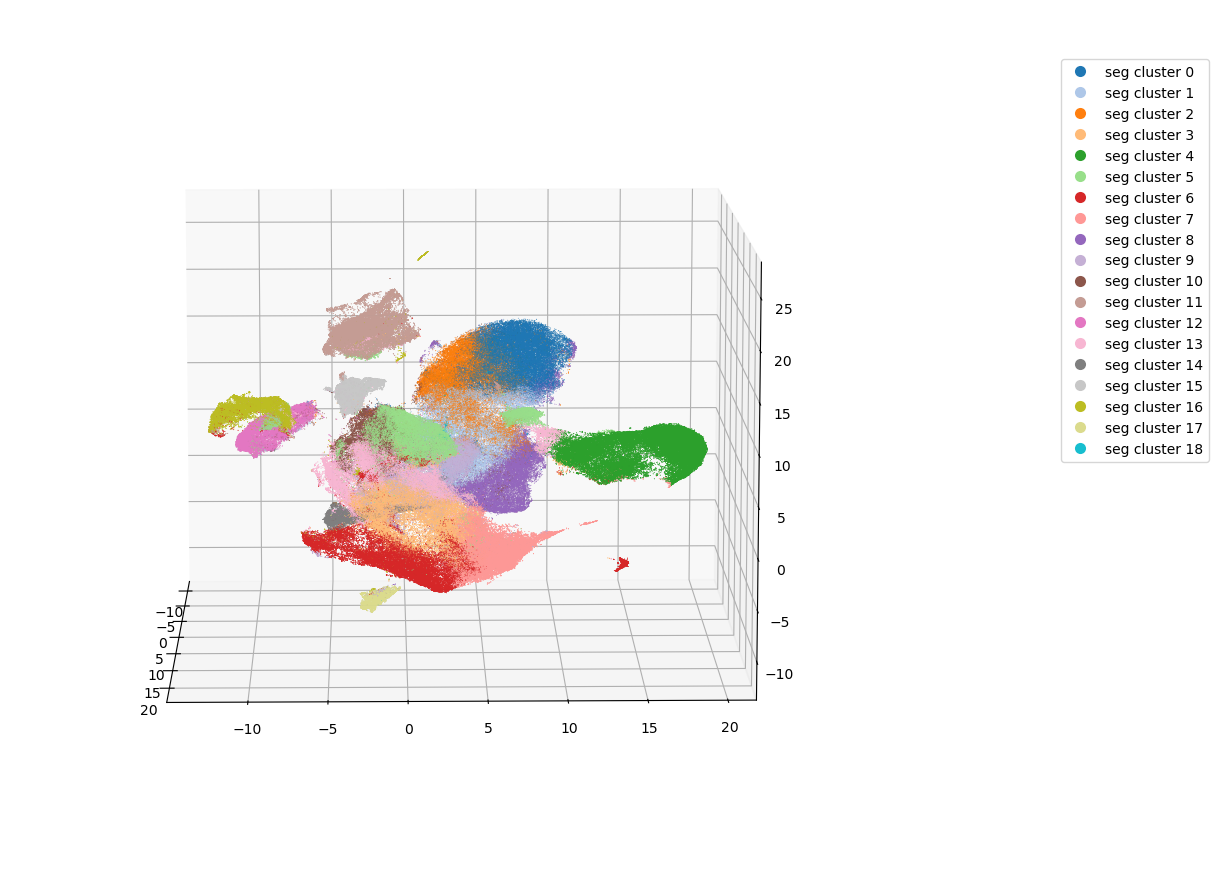

In [7]:
# generate and save animations
for clustering, data in data_dict.items():
    if not os.path.exists(os.path.join(out, f'{clustering}_200dpi.mp4')):
        print(f'Saving rotating plot for {clustering} clustering...')
        rotation_movie(clustering=clustering, main_sample=data[0], cmap=data[1], c=data[2])
print('Complete!')